In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
a=pd.read_csv("/content/drive/MyDrive/takehome_users.csv",encoding="ISO-8859-1")
a.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [133]:
a["last_session_creation_time"]=pd.to_datetime(a["last_session_creation_time"])
a['creation_time'] = pd.to_datetime(a['creation_time'])

In [134]:
a.info()
a.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.25,12000.0
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.00,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.00,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.00,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.00,5954.0,8817.00,11999.0


In [107]:
a.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [108]:
a.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [109]:
corr = a.corr().round(4)
corr

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,1.0000,0.0152,-0.0324,-0.0220,0.0041,0.0187
last_session_creation_time,0.0152,1.0000,0.0066,0.0080,0.0422,0.0119
opted_in_to_mailing_list,-0.0324,0.0066,1.0000,0.4835,0.0034,0.0047
enabled_for_marketing_drip,-0.0220,0.0080,0.4835,1.0000,0.0093,0.0037
org_id,0.0041,0.0422,0.0034,0.0093,1.0000,-0.0578
invited_by_user_id,0.0187,0.0119,0.0047,0.0037,-0.0578,1.0000


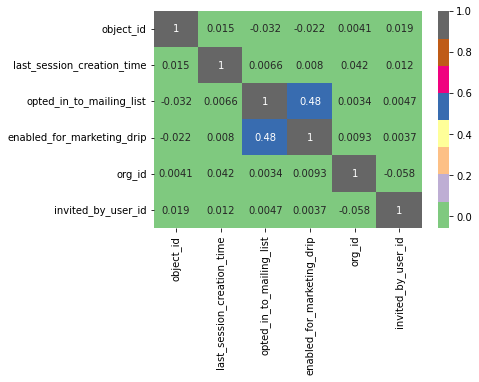

In [152]:
sns.heatmap(corr,annot =True,cmap="Accent")
plt.xticks(rotation = 90 )
plt.show()    

In [112]:
b=pd.read_csv("/content/drive/MyDrive/takehome_user_engagement.csv")
b.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [113]:
b.info()
b.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [114]:
b.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [115]:
b.duplicated().value_counts()

False    207917
dtype: int64

In [116]:


b['time_stamp'] = pd.to_datetime(b['time_stamp'])
b['time_stamp']


0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
                 ...        
207912   2013-09-06 06:14:15
207913   2013-01-15 18:28:37
207914   2014-04-27 12:45:16
207915   2012-06-02 11:55:59
207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [117]:
df =b.copy()     
df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [118]:
df['visited_7_days'] = df.groupby('user_id',as_index = False,group_keys = False).apply(lambda x:x.rolling('7D',on = 'time_stamp')['user_id'].count())
df     

,time_stamp,user_id,visited,visited_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0


In [66]:
user_adopted = df.groupby('user_id')['visited_7_days'].max().reset_index()
user_adopted.head() 

,user_id,visited_7_days
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0


In [67]:
user_adopted['adopted_user'] = user_adopted['visited_7_days'].apply(lambda x: 1 if x >= 3 else 0)
user_adopted['adopted_user'] 

0       0
1       1
2       0
3       0
4       0
       ..
8818    0
8819    0
8820    0
8821    0
8822    0
Name: adopted_user, Length: 8823, dtype: int64

In [68]:
user_adopted['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [127]:
df_users = a.join(user_adopted, on = 'object_id', how = 'left')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [128]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                8823 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.0+ MB


In [122]:
df_users['last_session_creation_time'].fillna(0, inplace = True)
df_users['adopted_user'].fillna(0, inplace = True)     

In [123]:
df_users.drop(['object_id','name','email','last_session_creation_time','creation_time'], axis = 1, inplace = True)     

In [124]:
df_users = pd.get_dummies(df_users, columns = ['creation_source'])     
df_users

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0.0,1,0,0,0,0
1,0,0,1,316.0,1.0,0,1,0,0,0
2,0,0,94,1525.0,0.0,0,1,0,0,0
3,0,0,1,5151.0,0.0,1,0,0,0,0
4,0,0,193,5240.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,8263.0,0.0,0,1,0,0,0
11996,0,0,200,NaN,0.0,0,0,0,0,1
11997,1,1,83,8074.0,0.0,1,0,0,0,0
11998,0,0,6,NaN,0.0,0,0,1,0,0


In [125]:
df_users.describe().T     

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.0,5954.0,8817.00,11999.0
adopted_user,12000.0,0.133500,0.340128,0.0,0.0,0.0,0.00,1.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP_GOOGLE_AUTH,12000.0,0.115417,0.319537,0.0,0.0,0.0,0.00,1.0


In [126]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  6417 non-null   float64
 4   adopted_user                        12000 non-null  float64
 5   creation_source_GUEST_INVITE        12000 non-null  uint8  
 6   creation_source_ORG_INVITE          12000 non-null  uint8  
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 8   creation_source_SIGNUP              12000 non-null  uint8  
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 527.5 KB


In [140]:
df_users.corr()['adopted_user']   

object_id                     0.004273
last_session_creation_time    0.396550
opted_in_to_mailing_list      0.006650
enabled_for_marketing_drip    0.002058
org_id                        0.074744
invited_by_user_id           -0.001709
adopted_user                  1.000000
Name: adopted_user, dtype: float64

In [142]:
s=df_users.corr().round(2)
s

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,1.00,0.02,-0.03,-0.02,0.00,0.02,0.00
last_session_creation_time,0.02,1.00,0.01,0.01,0.04,0.01,0.40
opted_in_to_mailing_list,-0.03,0.01,1.00,0.48,0.00,0.00,0.01
enabled_for_marketing_drip,-0.02,0.01,0.48,1.00,0.01,0.00,0.00
org_id,0.00,0.04,0.00,0.01,1.00,-0.06,0.07
invited_by_user_id,0.02,0.01,0.00,0.00,-0.06,1.00,-0.00
adopted_user,0.00,0.40,0.01,0.00,0.07,-0.00,1.00


<function matplotlib.pyplot.show(*args, **kw)>

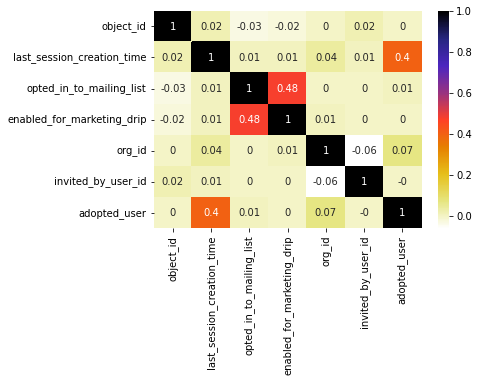

In [155]:
sns.heatmap(s,annot=True,cmap="CMRmap_r")
plt.xticks(rotation='90')
plt.show